# Google Play Store Apps

# Import Libraries , Load and Inspect Data

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [57]:
# Load the dataset
data = pd.read_csv('googleplaystore.csv')

In [58]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [59]:
data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


# Data Cleaning

In [60]:
# Data Cleaning
# Drop rows with missing 'Rating'
data = data.dropna(subset=['Rating'])

In [61]:
# Fill missing values in 'Current Ver' and 'Android Ver' with placeholder 'Unknown'
data['Current Ver'].fillna('Unknown', inplace=True)
data['Android Ver'].fillna('Unknown', inplace=True)

In [62]:
# Convert 'Reviews' to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [63]:
# Remove duplicates
data = data.drop_duplicates()

In [64]:
# Convert 'Installs' to numeric by removing '+' and ',' and then convert to integer
data = data[data['Installs'] != 'Free']  # Filter out rows where 'Installs' is 'Free'

data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(int)

In [65]:
# Convert 'Price' to numeric by removing '$' and then convert to float
data['Price'] = data['Price'].str.replace('$', '').astype(float)

C:\Users\hp\AppData\Local\Temp\ipykernel_11748\3000358838.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '').astype(float)


# Data Visualization Techniques

We will use various visualization techniques to explore the data

1.Line Plot - Average Rating over Categories

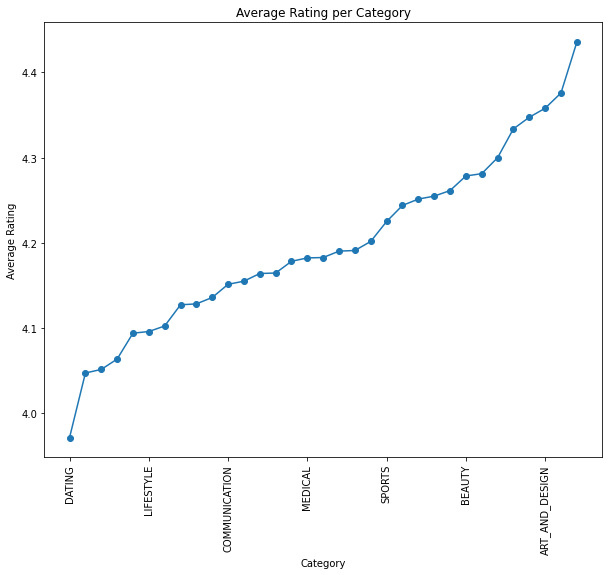

In [66]:
# Calculate the average rating per category
avg_rating_per_category = data.groupby('Category')['Rating'].mean().sort_values()

# Plotting
plt.figure(figsize=(10, 8))
avg_rating_per_category.plot(kind='line', marker='o')
plt.title('Average Rating per Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


2.Bar Plot - Number of Apps per Category

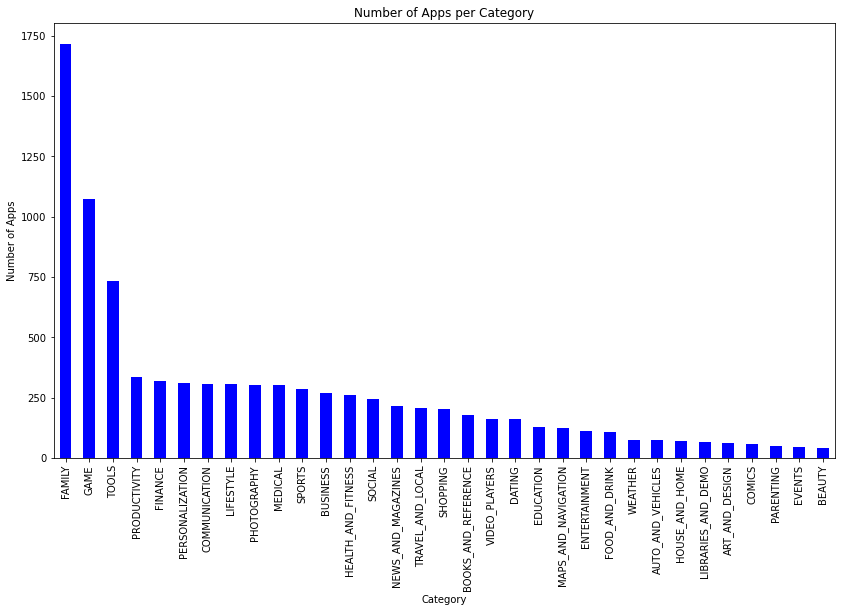

In [67]:
# Count the number of apps per category
num_apps_per_category = data['Category'].value_counts()

# Plotting
plt.figure(figsize=(14, 8))
num_apps_per_category.plot(kind='bar', color='blue')
plt.title('Number of Apps per Category')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()

3.Histogram - Distribution of Ratings

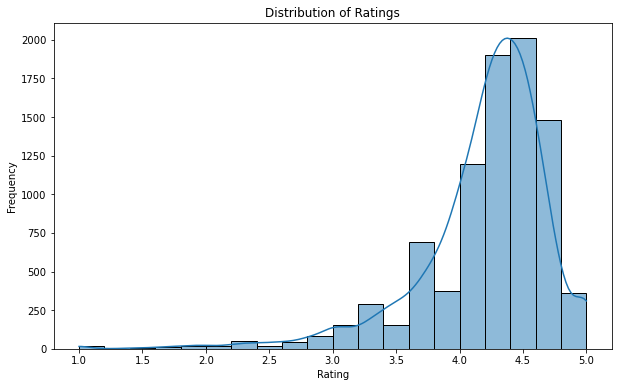

In [68]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

4.Pie Chart - Proportion of Free vs Paid Apps

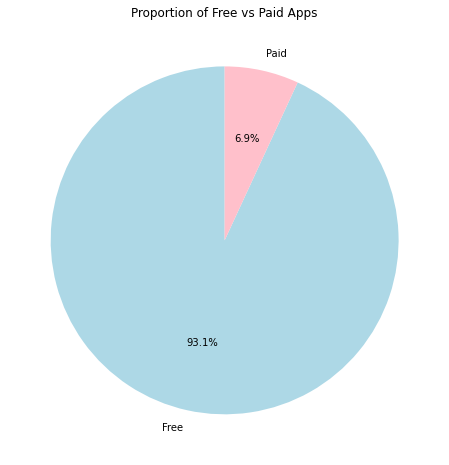

In [69]:
# Count the number of free and paid apps
app_type_counts = data['Type'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))
app_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'pink'])
plt.title('Proportion of Free vs Paid Apps')
plt.ylabel('')
plt.show()


5.Heatmap - Correlation Matrix

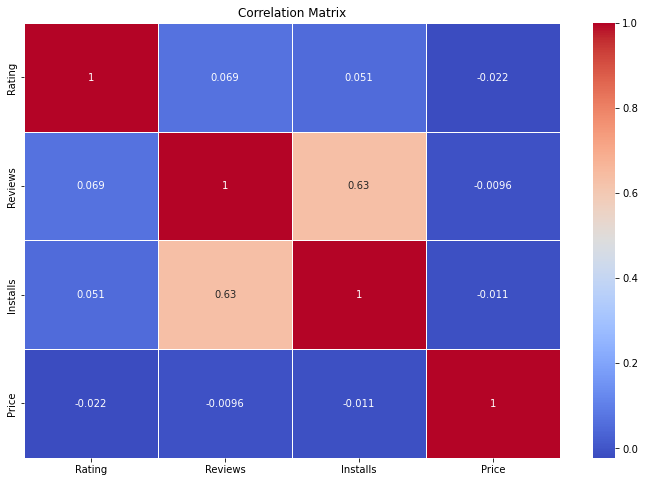

In [70]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

6.Scatter Plot - Rating vs. Number of Reviews

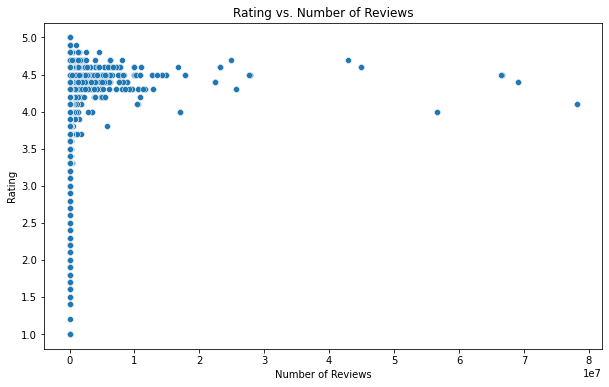

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=data)
plt.title('Rating vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

7.Box Plot - Rating by Content Rating (Interquartile Range)

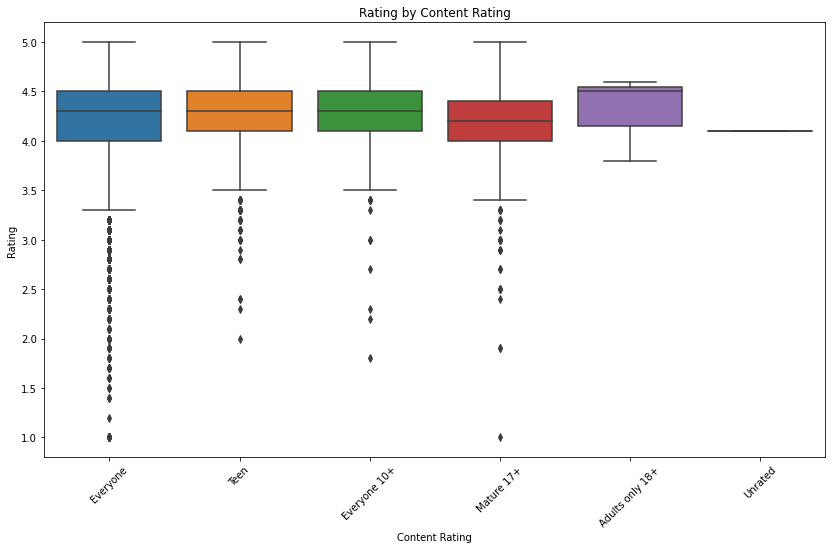

In [72]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Content Rating', y='Rating', data=data)
plt.title('Rating by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

# linear Regression

In [73]:
# Drop rows with any NaN values in the features to be used
features = ['Reviews', 'Installs', 'Price']
data = data.dropna(subset=features)

In [74]:
# Select features and label
X = data[features]
y = data['Rating']

In [75]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Predict on the test set
y_pred = model.predict(X_test)

In [78]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.26187839113939804
R-squared: 0.004578476309555102


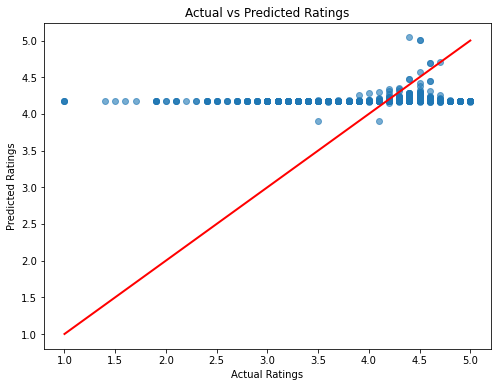

In [79]:
# Simple scatter plot of predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()

# Summary Description

The dataset provided consists of information about various apps available on the Google Play Store. The data includes app names, categories, ratings, number of reviews, sizes, number of installs, type (free or paid), price, content rating, genres, last updated date, current version, and required Android version.

After performing data cleaning to handle missing values, convert data types, and remove duplicates, we conducted an exploratory data analysis. The following insights were observed:

Average Rating by Category: The average rating varies across different categories, with some categories consistently receiving higher ratings.

Number of Apps per Category: The number of apps is not evenly distributed among categories, with some categories being more popular than others.

Distribution of Ratings: Ratings are generally high, with most apps receiving ratings between 4.0 and 4.5.

Proportion of Free vs Paid Apps: The majority of apps are free, with paid apps constituting a smaller proportion.

Correlation Matrix: There are interesting correlations between different numerical variables, which can be explored further for predictive modeling.

Rating vs. Number of Reviews: Higher-rated apps tend to have more reviews, indicating a potential relationship between app popularity and rating.

Rating by Content Rating: Apps with different content ratings (e.g., Everyone, Teen) show variations in their average ratings. Overall, this analysis provides valuable insights into the Google Play Store app ecosystem, which can help in understanding app performance, user preferences, and market trends. Further analysis can be conducted, such as predictive modeling, to gain deeper insights and make informed decisions.